2511.366973492598


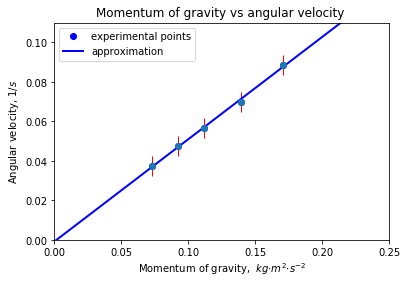

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import traceback
import matplotlib.gridspec as gridspec
from matplotlib import rcParams
import matplotlib.ticker as ticker
import datetime
from scipy.fftpack import fft
from math import pi
from sklearn.utils import shuffle
import itertools

data_A = pd.read_csv('C:/Users/gorar/Desktop/w1/data4.csv')


    
data_own = data_A['omega']
data_mom = data_A['Momentum']

I_0 = 0.00078
data_A['new_om']=data_mom/data_own/I_0
new_om = data_A['new_om']
print(np.mean(new_om))
fig_data = plt.figure()
subplot_data_A = fig_data.add_subplot(111)
#subplot_data_A.set_xticklabels('')
subplot_data_A.set_xlabel(r'Momentum of gravity,  $kg⋅m^2⋅s^{−2}$')
subplot_data_A.set_ylabel(r'Angular velocity, $1/s$ ')


plt.ylim(0, 0.11)
plt.xlim(0, 0.25)

line_data_A = subplot_data_A.plot(data_mom, data_own, marker = 'o', color='blue', linewidth=0, label='experimental points')


subplot_data_A.set_title('Momentum of gravity vs angular velocity ')
subplot_data_A.errorbar(data_mom, data_own, xerr = 0.001, yerr=0.005, fmt='o-', ecolor='red', linewidth=1, linestyle=' ')


a, b = np.polyfit(data_mom, data_own, 1)
data_A['app']=data_A['omega']*a+b
xx =list(range(25))
x = [i/100 for i in xx]

app = [ii*a+b for ii in x]
line_data_2 = subplot_data_A.plot(x, app, color='blue', linewidth=2, label='approximation')

subplot_data_A.legend()



In [10]:
def finder(T,dol_ho, dol_co):
    mol = [28.97/1000, 44.01/1000, 18.01/1000]
    Cp = [1.0036, 0.838, 1.863]
    Cv = [0.7166, 0.629, 1.403]
    R = 8.31
    dol_air = 1-dol_co-dol_ho
    xi = [dol_air, dol_co, dol_ho]
    cp = 0
    cv = 0
    mol_all = 0
    for i in range(2):
        cp = cp + Cp[i]*mol[i]*xi[i]
        cv = cv + Cv[i]*mol[i]*xi[i]
        mol_all = mol_all + xi[i]*mol[i]
    
    gam = cp/cv
    a = np.sqrt(gam*R*T/mol_all)
    return (a)


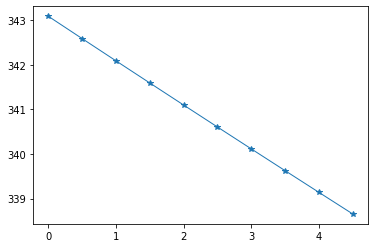

In [13]:
dol_co = [i/2 for i in list(range(0,10))] 
a_mass = []
for dol in dol_co:
    a_mass.append(finder(293, 0, dol/100))
fig = plt.figure()
sun_plt = fig.add_subplot(1,1,1)
line=sun_plt.plot(dol_co, a_mass, linewidth = 1, marker = "*")


In [39]:
dol_co = [i/10 for i in list(range(1,500))]
